**Instructions:**

- For questions that require coding, you need to write the relevant code and display its output. Your output should either be the direct answer to the question or clearly display the answer in it.
- For questions that require a written answer (sometimes along with the code), you need to put your answer in a Markdown cell. Writing the answer as a comment or as a print line is not acceptable.
- Receiving help from classmates and/or ideas from Generative AI is allowed. **However, you must submit your own original work.** 
- You need to render this file as HTML using Quarto and submit the HTML file. **Please note that this is a requirement and not optional.** A submission cannot be graded until it is properly rendered.

Import all the libraries and tools you need below.

In [41]:
# !pip install tensorflow
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from keras import layers, ops


First, install [Tensorflow](https://www.tensorflow.org/) and [Keras](https://keras.io/) to your Python environment. Depending on your version, Keras comes with Tensorflow, so you might not need to install Keras separately. 

Make sure both libraries are installed properly. Check if you can import Tensorflow, Keras and any tool from Keras in the cell above.

If you have installation issues, you are expected to communicate this to the instructor promptly.

### 1)

Run the line below to load the MNIST data. This dataset consists of black-and-white images of handwritten digits. Answer the following questions to familiarize yourself with the dataset. (You will use this dataset for this and the next **four** in-class assignments.)

- Print the shape of both the training and test datasets. How many dimensions does each dataset have?
- In tabular data, the dimensions represented the number of observations and variables, respectively. What do the dimensions represent in this dataset?
- How many images are there in the training and test datasets?
- What are the dimensions of each image?
- How many classes are there in the dataset? Print the set of the classes.

**(15 points)**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
# Print the shape of both the training and test dataset
print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {x_test.shape}')

# Check the dimension of each image
print(x_train.shape[1])
print(x_train.shape[2])

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
28
28


There are three dimensions for each dataset. The first dimension here should be the number of observation of handwriting digits and the second and third dimensions should be the size of array representing one handwriting image, 28 * 28 array. Therefore, there is 60,000 observations of images in a training dataset and 10,000 observations in the testing dataset. The dimension of the image is 28 * 28. 

In [20]:
# Check the number and set of classes
print(f'Number of classes: {len(set(y_train))} ')
print(f'Set of classes: {set(y_train)}')

Number of classes: 10 
Set of classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 2)

[Visualize](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) the images for three different digits. Would they be considered low or high-resolution images? What happens in terms of the dimensionality of the data as the resolution increases in an image dataset? **(10 points)**

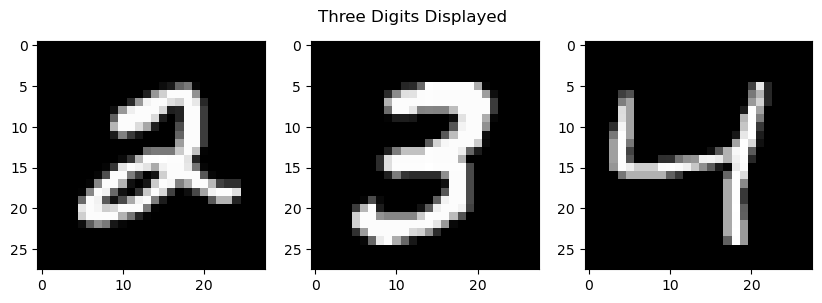

In [28]:
# Visualize the image 
# Create an empty plot
fig, axes = plt.subplots(1,3, figsize= (10,3))

digit_show = [2,3,4]
# Write a loop to visualize the 
for axes, digit in zip(axes, digit_show):
    # Accessing the first appearance of 2/3/4 in the first array
    index = np.where(y_train == digit)[0][0]
    # Show the image inscribed in x_train
    axes.imshow(x_train[index], cmap= 'gray')

# Setup title name
fig.suptitle('Three Digits Displayed')
plt.show()




The image of digits here are 28 * 28, recognized as low-resolution. As the resolution of images increases, the dimensionality of data will increase quadratically as the increased resolution of images means the increase in number of pixels representing the two dimension area. For instance, if we increase the resolution from 28 * 28 to 56 * 56, the dimensionality, here recognized as the number of pixels representing each grid of pictures, will increase from 28 * 28 = 784 to 56 * 56 = 4 * 784. We see that the two times increase in resolution leads to four times increase in dimensionality.

### 3)

An artificial neural network (ANN) cannot handle image data in its raw format, i.e. as a tensor. Therefore, you need to transform the image data into the tabular format that is used by all the classical Machine Learning (ML) models you learned in STAT 362 (and in STAT 301/303).

[Reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) both the training and test dataset into two-dimensional matrices. Each observation should represent an image and each predictor should represent a pixel value.

Print the `shape` of the reshaped matrices to check if the data is processed correctly.

**(7.5 points)**

In [32]:
# Reshape data to comply with ANN (Make all x variables in to one number, 28 * 28 dimensions)
x_train_new = x_train.copy()
x_test_new = x_test.copy()
x_train_new = np.reshape(x_train_new, (60000, 28 * 28))
x_test_new = np.reshape(x_test_new, (10000, 28 * 28))

# Test the shape
print(x_train_new.shape)
print(x_test_new.shape)


(60000, 784)
(10000, 784)


### 4)

When the images in a dataset are processed into vectors by simply stacking their columns on top of one another, this is called **vectorization**. What information about the images is lost when an image dataset is processed with vectorization?

(This issue will be solved later by a special type of network architecture.)

**(7.5 points)**

There are two main losses from the vectorization method. 

Firstly, the information of neighborhood of each pixel is lost. After vectorization, we do not know the local neighborhood of each pixel representing a part of a certain digit anymore.

Secondly, we lost the spatial relationship in big image. For example, when we look at 1, we have an image in our mind that it should look like a stick with a tip. The vectorization makes this information collapses.

### 5)

Start an **empty** ANN model with the `Sequential` object. **(7.5 points)**

In [34]:
# Create an empty network
network = Sequential()

### 6)

Add an input layer to the network. The number of nodes should be consistent with the data. **(12.5 points)**

**Note:** Be careful with rerunning the cell multiple times.

In [ ]:
# Add an input layer to a network ()
network.add(InputLayer(shape=(x_train_new.shape[1],))) # An input layer of 784 nodes

### 7)

Add an output layer to the network. The number of nodes should be consistent with the data. **(12.5 points)**

**Notes:** 

- Do not use any other input than the number of nodes in the layer. You will build on this basic network in the upcoming in-class assignments.
- Be careful with rerunning the cell multiple times.

In [ ]:
# Add output layer
network.add(Dense(len(set(y_train)))) # Ten possible categorical outputs

### 8)

Find out how many parameters you (already) have in this basic network by printing its `summary`. **(7.5 points)**

In [39]:
# Find out the number of parameters
print(network.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

None


There is 7850 parameters.

### 9)

How many layers does the network currently have? Does it have any hidden layers? Is it considered a "deep network"? **(5 points)**

The network currently has two layers: input layer and output layer. Since there is no hidden layer, it is not considered as a deep network.

### 10)

It is also useful to learn how to create a network in a less object-oriented way, which, for some special architectures, might be the only option.

Recreate the network you finalized in Question 7 by directly using a `Sequential` object with some inputs. You can follow [the guide on the Keras documentation](https://keras.io/guides/sequential_model/). **Note that your layers and their inputs should be the same as the network finalized in Question 7.** Reprint the network summary. You should have the same output as in Question 8 (with the name of the layer slightly different).

**(15 points)**

In [45]:
# Recreate the network by using less object-oriented way
new_network = Sequential([InputLayer(shape= (x_train_new.shape[1],)), layers.Dense(len(set(y_train)), name = 'Output Layer')])

print(new_network.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output Layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

None
